### Full Name : Tina Halimi
### Student Number : 400101078


# Support Vector Machines (SVM)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [2]:
df = pd.read_csv("Liver_Disease.csv") 

In [3]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64


### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Shape of the dataset: (583, 11)
Missing values in each column:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Distribution of the target variable:
label
1    416
2    167
Name: count, dtype: int64


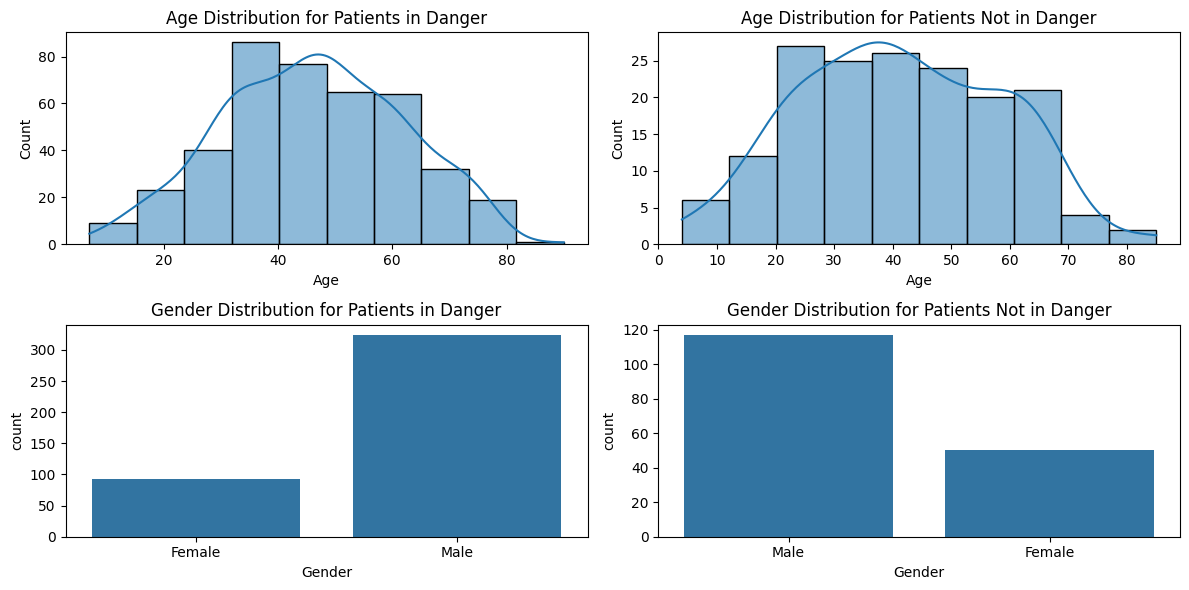

In [4]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
print(f"Shape of the dataset: {df.shape}")
###############################################################################


###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
###############################################################################

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
print("Distribution of the target variable:")
print(df['label'].value_counts())
###############################################################################

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df[df['label'] == 1]['Age'], bins=10, kde=True)
plt.title("Age Distribution for Patients in Danger")

plt.subplot(2, 2, 2)
sns.histplot(df[df['label'] == 2]['Age'], bins=10, kde=True)
plt.title("Age Distribution for Patients Not in Danger")

plt.subplot(2, 2, 3)
sns.countplot(x='Gender', data=df[df['label'] == 1])
plt.title("Gender Distribution for Patients in Danger")

plt.subplot(2, 2, 4)
sns.countplot(x='Gender', data=df[df['label'] == 2])
plt.title("Gender Distribution for Patients Not in Danger")

plt.tight_layout()
plt.show()
###############################################################################


##### Question: What do you conclude from the plots?

### Conclusion from the Plots:

1. **Age Distribution:**
   - **Patients in Danger:** Most patients fall between 30 to 60 years, with a peak around 40–50 years.
   - **Patients Not in Danger:** Mostly younger patients under 40 years, with a peak around 30–40 years.

2. **Gender Distribution:**
   - **Patients in Danger:** Significantly more males than females.
   - **Patients Not in Danger:** More balanced, but still more males than females.

### Insights:
Older males (30–60 years) are more likely to be classified as "in danger," suggesting a focus on this group for further analysis or preventive care.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [5]:
# using Z score
numeric_cols = df.select_dtypes(include=[np.number])

df_clean = df.copy()

for col in numeric_cols.columns:
    z_scores = np.abs(stats.zscore(df[col]))
    df_clean = df_clean[(z_scores < 3) | (z_scores.isna())] 

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers column-wise: {df_clean.shape}")

Original shape: (583, 11)
Shape after removing outliers column-wise: (538, 11)


/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/4046081848.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(z_scores < 3) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/4046081848.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(z_scores < 3) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/4046081848.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(z_scores < 3) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/4046081848.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[(z_scores < 3) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/4046081848.py:8: UserWarning: Boolean Series key will be reindexed to m

#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [6]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################
numeric_cols = df_clean.select_dtypes(include=[np.number])

# df_clean_normalized = df_clean

scaler = MinMaxScaler()

df_clean[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

df_clean['Gender'][df_clean['Gender']=="Male"] = 0
df_clean['Gender'][df_clean['Gender']=="Female"] = 1

print("Normalized numerical features in df_clean:")
df_clean


Normalized numerical features in df_clean:


/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/1876694147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'][df_clean['Gender']=="Male"] = 0
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/1876694147.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Gender'][df_clean['Gender']=="Female"] = 1


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
0,0.709302,1,0.015625,0.000000,0.139797,0.009804,0.008511,0.533333,0.521739,0.240,0.0
1,0.674419,0,0.546875,0.574468,0.717024,0.088235,0.095745,0.650000,0.500000,0.176,0.0
2,0.674419,0,0.359375,0.425532,0.481398,0.081699,0.061702,0.566667,0.521739,0.236,0.0
3,0.627907,0,0.031250,0.031915,0.134160,0.006536,0.010638,0.533333,0.543478,0.280,0.0
4,0.790698,0,0.182292,0.202128,0.148816,0.027778,0.052128,0.616667,0.326087,0.040,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,0,0.005208,0.000000,0.492672,0.016340,0.025532,0.383333,0.152174,0.028,1.0
579,0.418605,0,0.010417,0.000000,0.039459,0.040850,0.022340,0.400000,0.500000,0.320,0.0
580,0.558140,0,0.020833,0.010638,0.205186,0.062092,0.041489,0.466667,0.500000,0.280,0.0
581,0.313953,0,0.046875,0.042553,0.136415,0.031046,0.023404,0.533333,0.543478,0.280,0.0


### SVM

#### spliting data

In [7]:
df_clean = df_clean.dropna()

X = df_clean.drop('label', axis=1)
y = df_clean['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (427, 10)
Testing set shape: (107, 10)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [8]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the SVM model: {accuracy}")
print("Classification Report:")
print(report)

Accuracy of the SVM model: 0.7757009345794392
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87        83
         1.0       0.00      0.00      0.00        24

    accuracy                           0.78       107
   macro avg       0.39      0.50      0.44       107
weighted avg       0.60      0.78      0.68       107



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [9]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf'] 
}

svm_model = SVC()

grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [10]:
print("Best parameters found by Grid Search:")
print(grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best SVM model: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters found by Grid Search:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy of the best SVM model: 0.7757009345794392
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87        83
         1.0       0.00      0.00      0.00        24

    accuracy                           0.78       107
   macro avg       0.39      0.50      0.44       107
weighted avg       0.60      0.78      0.68       107



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Train an svm model on the entire training data using the parameters you found in the previous step.

In [11]:
svm_best = SVC(C=0.1, gamma=1, kernel='rbf')

svm_best.fit(X_train, y_train)

y_pred = svm_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of the SVM model with best parameters: {accuracy}")
print("Classification Report:")
print(report)

Accuracy of the SVM model with best parameters: 0.7757009345794392
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.87        83
         1.0       0.00      0.00      0.00        24

    accuracy                           0.78       107
   macro avg       0.39      0.50      0.44       107
weighted avg       0.60      0.78      0.68       107



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

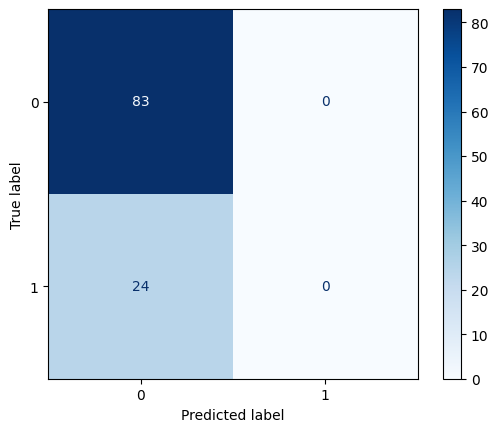

In [12]:
y_pred = svm_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

print("Confusion Matrix:")
print(cm)
print(f"True Positives (TP): {cm[1, 1]}")
print(f"True Negatives (TN): {cm[0, 0]}")
print(f"False Positives (FP): {cm[0, 1]}")
print(f"False Negatives (FN): {cm[1, 0]}")

Model accuracy: 0.7757009345794392
Confusion Matrix:
[[83  0]
 [24  0]]
True Positives (TP): 0
True Negatives (TN): 83
False Positives (FP): 0
False Negatives (FN): 24


### Confusion Matrix Explanation:

1. **True Positive (TP)**: Correctly predicted positive cases (e.g., model predicts disease, and the patient has it).
2. **True Negative (TN)**: Correctly predicted negative cases (e.g., model predicts no disease, and the patient doesn't have it).
3. **False Positive (FP)**: Incorrectly predicted positive (e.g., model predicts disease, but the patient doesn't have it).
4. **False Negative (FN)**: Incorrectly predicted negative (e.g., model predicts no disease, but the patient has it).

These values help evaluate the model’s accuracy, precision, recall, and F1-score.

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [26]:
numeric_cols = df.select_dtypes(include=[np.number])

df_clean_outliers = df.copy()

for col in numeric_cols.columns:
    z_scores = np.abs(stats.zscore(df[col]))
    df_clean_outliers = df_clean_outliers[(z_scores < 4) | (z_scores.isna())] 

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers column-wise: {df_clean_outliers.shape}")

Original shape: (583, 11)
Shape after removing outliers column-wise: (557, 11)


/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/2178497455.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_outliers = df_clean_outliers[(z_scores < 4) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/2178497455.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_outliers = df_clean_outliers[(z_scores < 4) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/2178497455.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_outliers = df_clean_outliers[(z_scores < 4) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/2178497455.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_outliers = df_clean_outliers[(z_scores < 4) | (z_scores.isna())]
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986

In [27]:
numeric_cols = df_clean_outliers.select_dtypes(include=[np.number])

scaler = MinMaxScaler()

df_clean_outliers[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

df_clean_outliers['Gender'][df_clean_outliers['Gender']=="Male"] = 0
df_clean_outliers['Gender'][df_clean_outliers['Gender']=="Female"] = 1

/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/3720774500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_outliers['Gender'][df_clean_outliers['Gender']=="Male"] = 0
/var/folders/w1/6xdwk4ls5nb4d1hy_mlzx5380000gn/T/ipykernel_25986/3720774500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_outliers['Gender'][df_clean_outliers['Gender']=="Female"] = 1


In [28]:
df_clean_outliers = df_clean_outliers.dropna()

X = df_clean_outliers.drop('label', axis=1)
y = df_clean_outliers['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (442, 10)
Testing set shape: (111, 10)


In [29]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [30]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

In [31]:
# SVM Results
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Logistic Regression Results
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Model Accuracy: {accuracy_logreg}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

SVM Model Accuracy: 0.7027027027027027
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      1.00      0.83        78
         1.0       0.00      0.00      0.00        33

    accuracy                           0.70       111
   macro avg       0.35      0.50      0.41       111
weighted avg       0.49      0.70      0.58       111

Logistic Regression Model Accuracy: 0.6936936936936937
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.97      0.82        78
         1.0       0.33      0.03      0.06        33

    accuracy                           0.69       111
   macro avg       0.52      0.50      0.44       111
weighted avg       0.59      0.69      0.59       111



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Comparison of Results:

1. **Overall Accuracy**:
   - The **SVM** model and the **Logistic Regression** model have similar accuracy, with SVM slightly better at 70% compared to 69%.

2. **Class 0 (Non-outliers)**:
   - Both models perform well for **class 0**, with nearly identical precision and F1-scores. However, SVM has a perfect recall (1.00), while Logistic Regression has a recall of 0.97.

3. **Class 1 (Outliers)**:
   - Both models struggle significantly with classifying **outliers (class 1)**.
   - The **SVM** model fails completely for class 1, with 0 precision, recall, and F1-score.
   - The **Logistic Regression** model does slightly better, with a precision of 0.33, but it still has poor recall (0.03) and F1-score (0.06).